In [1]:
import numpy as np
import scipy as sc
import math
from datetime import timedelta, datetime
from operator import attrgetter
import copy_plottrajectoriesfile as cpt
import matplotlib.animation as animation
import imageio #to make .gif out of mvultiple .png
import matplotlib.pyplot as plt
import scipy.io as sio #to load matlab file
import xarray as xr
from shapely.geometry import Point, Polygon
from astropy.io import ascii
from astropy.table import Table, Column

In [2]:
"""
Load polygons of beaching
"""

boundaries_poly = sio.loadmat('polygons_files/polygons_beaching.mat')

In [3]:
"""
Extract lon lat of polygon n5
"""

lon_poly = boundaries_poly['lon_pol5'][0]
lat_poly = boundaries_poly['lat_pol5'][0]

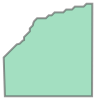

In [4]:
"""
Create polygon from lat/lon
"""

coords_poly = [(lat_poly[i],lon_poly[i]) for i in range(0,len(lon_poly))]
poly = Polygon(coords_poly)
poly

In [7]:
"""
Load particle trajectories output .nc file 
"""

filename = 'nc_trajectory_files/18_varydeg_CD01_konsole.nc'

file=xr.open_dataset(filename,engine='netcdf4')

In [8]:
latitude = np.asarray(file['lat']).reshape(len(file['lat']),len(file['lat'][0]),1)
longitude = np.asarray(file['lon']).reshape(len(file['lon']),len(file['lon'][0]),1)

coords = [np.hstack((latitude[i],longitude[i])) for i in range(len(file['lat']))]
p = [[Point(coords[i][j]) for j in range(len(file['lat'][i]))] for i in range(len(file['lat']))]

import pandas as pd

"""
Save time, lon, lat and number of the beached particles
"""

particle_beached, time_beached, lat_beached, lon_beached, deg_beached = [], [], [], [], []

for i in range(0,len(file['lat'])):
    for j in range(0,len(file['lat'][i])):
        if p[i][j].within(poly):
            particle_beached.append(i)
            time_beached.append(file['time'][i][j].data)
            lat_beached.append(file['lat'][i][j].data)
            lon_beached.append(file['lon'][i][j].data)
            #deg_beached.append(file['deg'][i][j].data)
            break
beaching_table = Table([time_beached, particle_beached, lat_beached, lon_beached], names = ('time','particle #','lat','lon'))
ascii.write(beaching_table, 'results_beaching/18_varydeg_CD01_konsole.csv', format='csv', fast_writer=False, overwrite=True)  

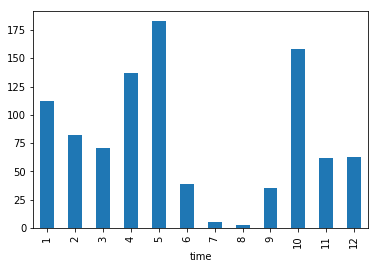

In [7]:
import pandas as pd
deg_m40_all18=pd.read_csv('results_beaching/17_0deg_CD04_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

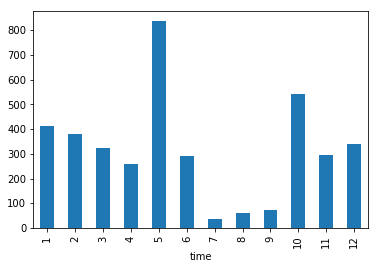

In [18]:
deg_m40_all18=pd.read_csv('results_beaching/17_0deg_CD015_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

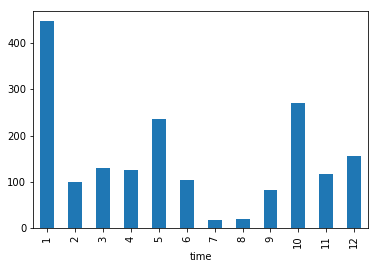

In [17]:
deg_m40_all18=pd.read_csv('results_beaching/17_varydeg_CD03_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

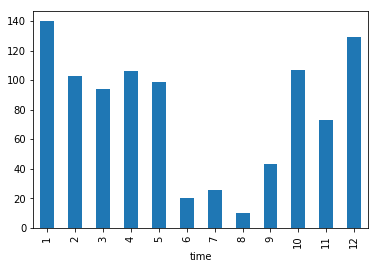

In [8]:
deg_m40_all18=pd.read_csv('results_beaching/17_randdeg_CD04_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

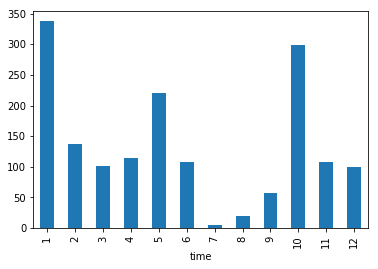

In [16]:
deg_m40_all18=pd.read_csv('results_beaching/17_0deg_CD03_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

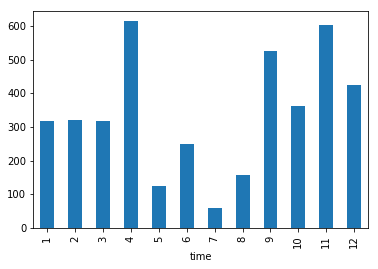

In [21]:
deg_m40_all18=pd.read_csv('results_beaching/18_0deg_CD015_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

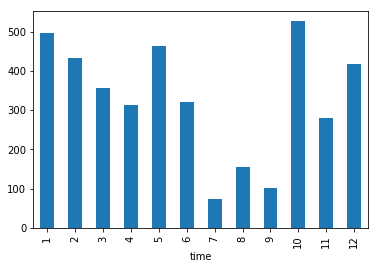

In [27]:
%matplotlib inline
plt.figure()
deg_m40_all18=pd.read_csv('results_beaching/17_varydeg_CD015_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

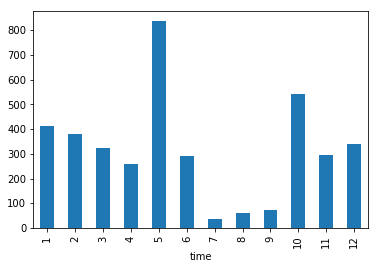

In [28]:
%matplotlib inline
deg_m40_all18=pd.read_csv('results_beaching/17_0deg_CD015_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

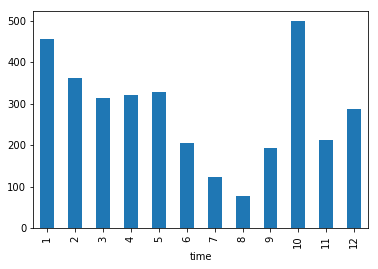

In [26]:
%matplotlib inline
deg_m40_all18=pd.read_csv('results_beaching/17_randdeg_CD015_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

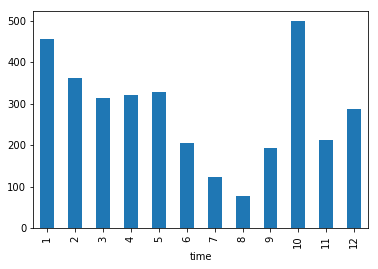

In [20]:
deg_m40_all18=pd.read_csv('results_beaching/17_randdeg_CD015_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

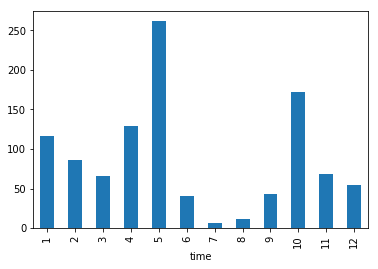

In [9]:
deg_m40_all18=pd.read_csv('results_beaching/17_varydeg_CD04_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

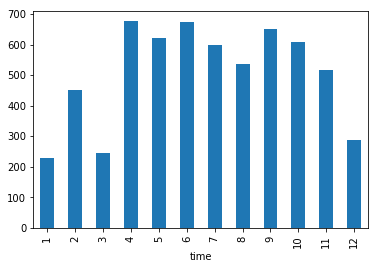

In [38]:
deg_m40_all18=pd.read_csv('results_beaching/17_advection_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

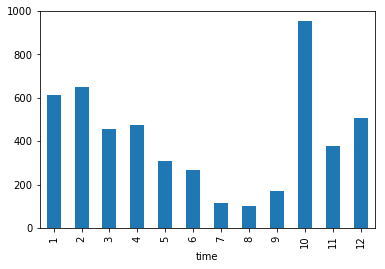

In [3]:
deg_m40_all18=pd.read_csv('results_beaching/17_justwinds_randomdeg_CD1_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

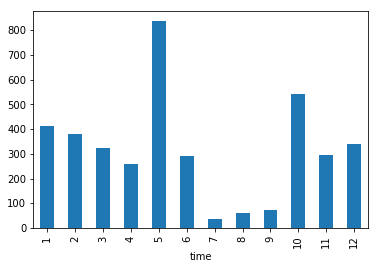

In [19]:
deg_m40_all18=pd.read_csv('results_beaching/17_0deg_CD015_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

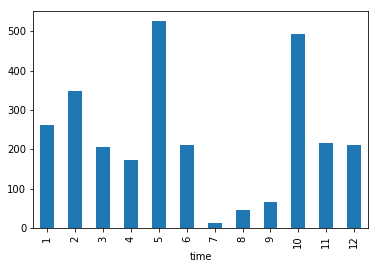

In [10]:
deg_m40_all18=pd.read_csv('results_beaching/17_0deg_CD02_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

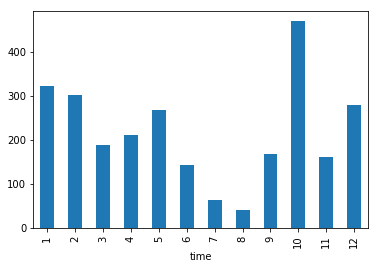

In [11]:
deg_m40_all18=pd.read_csv('results_beaching/17_randdeg_CD02_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

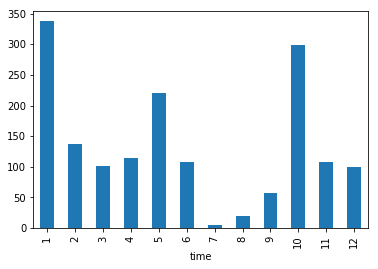

In [13]:
deg_m40_all18=pd.read_csv('results_beaching/17_0deg_CD03_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

In [26]:
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")

a=deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count()

In [32]:
a.

903

In [37]:
deg_m40_all18=pd.read_csv('results_beaching/17_0deg_cay1_konsole.csv')
#deg_m40_all18

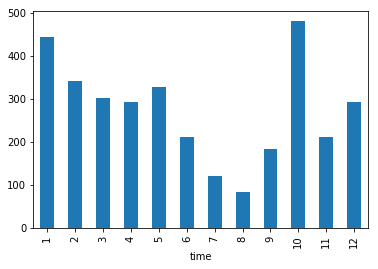

In [33]:
deg_m40_all18=pd.read_csv('results_beaching/17_randomdeg_CD015_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

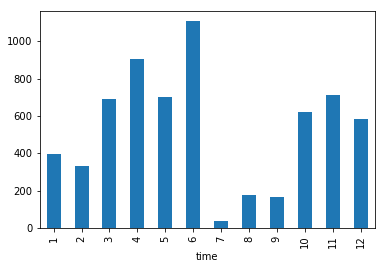

In [34]:
deg_m40_all18=pd.read_csv('results_beaching/17_randomdeg_cay1_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

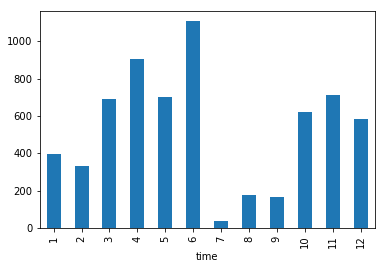

In [8]:
deg_m40_all18=pd.read_csv('results_beaching/17_0deg_cay1_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

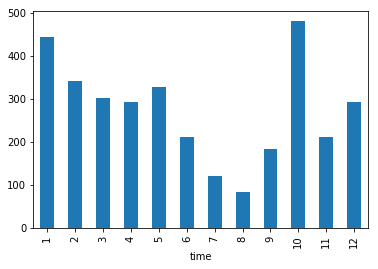

In [22]:
deg_m40_all18=pd.read_csv('results_beaching/17_0deg_CD01_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

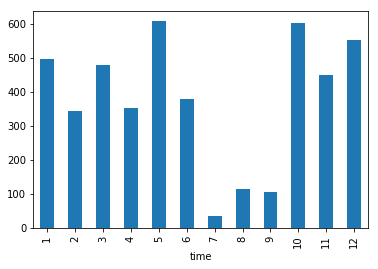

In [9]:
deg_m40_all18=pd.read_csv('results_beaching/17_0deg_CD01_konsolereal.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

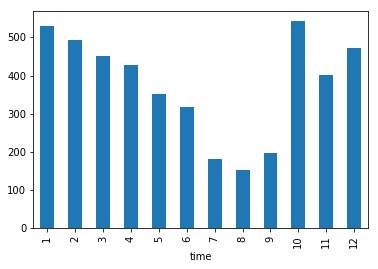

In [10]:
deg_m40_all18=pd.read_csv('results_beaching/17_randomdeg_CD01_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

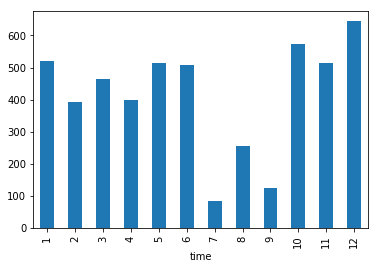

In [11]:
deg_m40_all18=pd.read_csv('results_beaching/17_varyingdeg_CD01_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

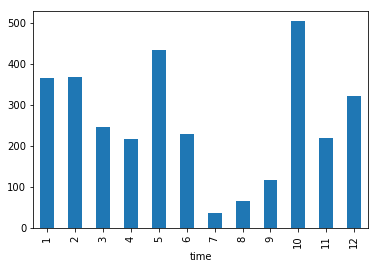

In [15]:
deg_m40_all18=pd.read_csv('results_beaching/17_varydeg_CD02_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

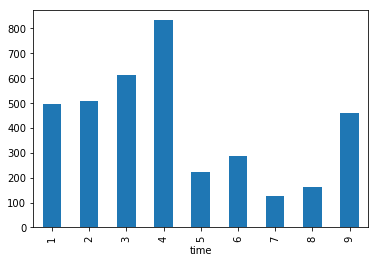

In [8]:
deg_m40_all18=pd.read_csv('results_beaching/18_varyingdeg_CD01_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

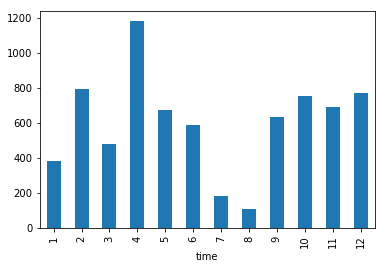

In [6]:
deg_m40_all18=pd.read_csv('results_beaching/18_varyingdeg_cay1_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

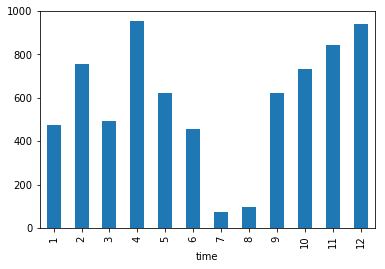

In [85]:
deg_m40_all18=pd.read_csv('results_beaching/18_0deg_CD004_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

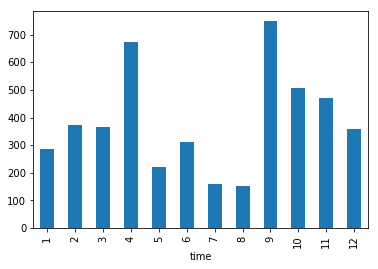

In [29]:
deg_m40_all18=pd.read_csv('results_beaching/18_randdeg_CD015_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

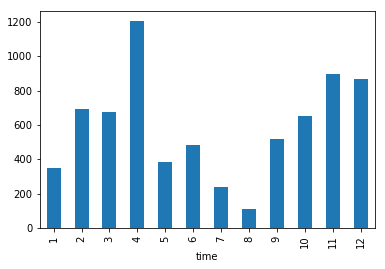

In [59]:
deg_m40_all18=pd.read_csv('results_beaching/18_random_cay1_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

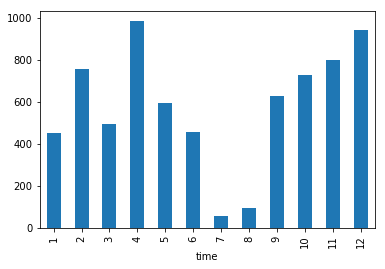

In [19]:
deg_m40_all18=pd.read_csv('results_beaching/18_0deg_cay1_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

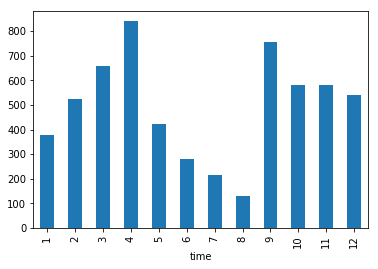

In [140]:
deg_m40_all18=pd.read_csv('results_beaching/18_random_CD1_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

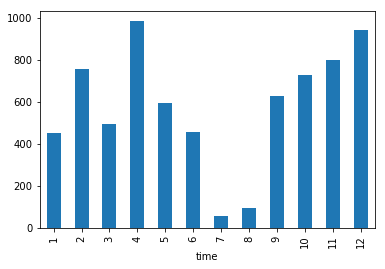

In [12]:
deg_m40_all18=pd.read_csv('results_beaching/18_0deg_cay1_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

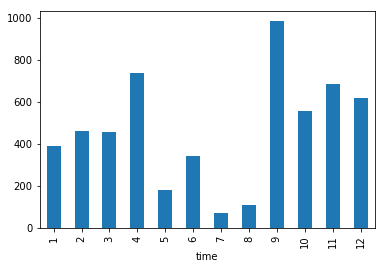

In [13]:
deg_m40_all18=pd.read_csv('results_beaching/18_0deg_CD01_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

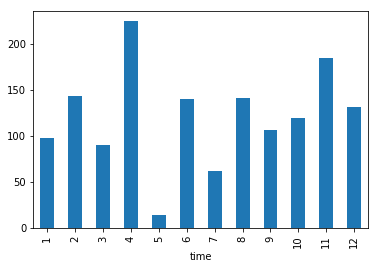

In [30]:
deg_m40_all18=pd.read_csv('results_beaching/18_0deg_CD03_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

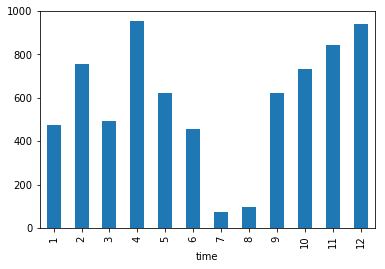

In [14]:
deg_m40_all18=pd.read_csv('results_beaching/18_0deg_CD004_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

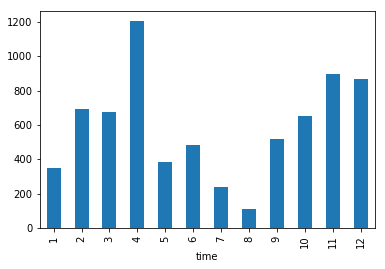

In [15]:
deg_m40_all18=pd.read_csv('results_beaching/18_random_cay1_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

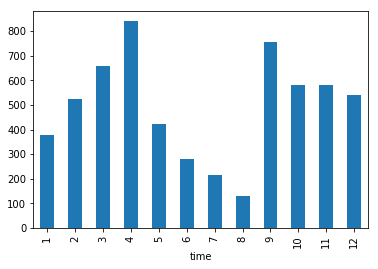

In [16]:
deg_m40_all18=pd.read_csv('results_beaching/18_random_CD1_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

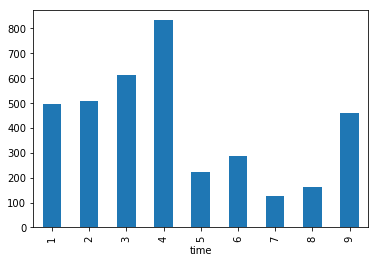

In [17]:
deg_m40_all18=pd.read_csv('results_beaching/18_varyingdeg_CD01_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

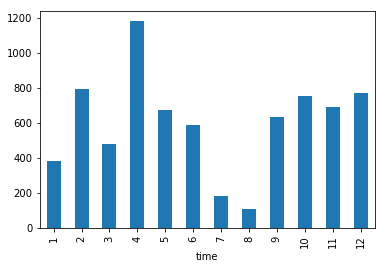

In [18]:
deg_m40_all18=pd.read_csv('results_beaching/18_varyingdeg_cay1_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

In [75]:
yo=[]
for i in range(len(deg_m40_all18['time'])):
    if (deg_m40_all18['time'][i].month)==4:
        yo.append(deg_m40_all18['time'][i].index)

AttributeError: 'Timestamp' object has no attribute 'index'

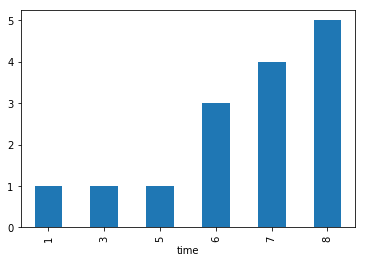

In [142]:
deg_m40_all18['time'].drop_duplicates(keep=False).groupby(deg_m40_all18['time'].drop_duplicates(keep=False).dt.month).count().plot(kind="bar")

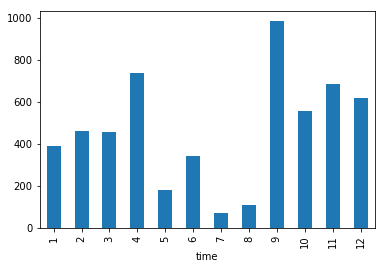

In [7]:
deg_m40_all18=pd.read_csv('results_beaching/18_0deg_CD01_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

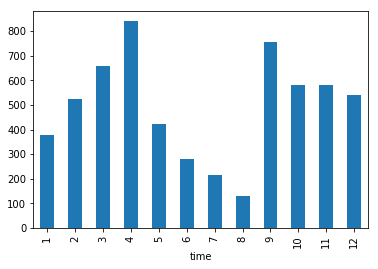

In [8]:
deg_m40_all18=pd.read_csv('results_beaching/18_random_CD1_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

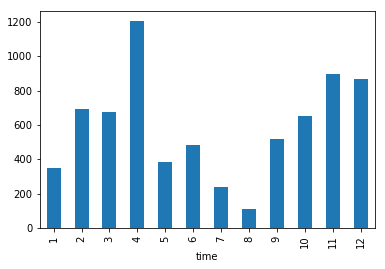

In [122]:
deg_m40_all18=pd.read_csv('results_beaching/18_random_cay1_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

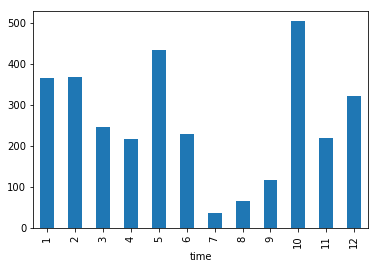

In [14]:
deg_m40_all18=pd.read_csv('results_beaching/17_varydeg_CD02_konsole.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

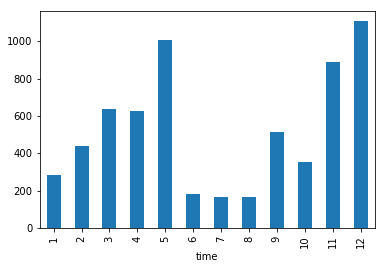

In [21]:
deg_m40_all18=pd.read_csv('results_beaching/18_random_cay1.csv')
deg_m40_all18['time']=deg_m40_all18['time'].astype("datetime64")
deg_m40_all18['time'].groupby(deg_m40_all18["time"].dt.month).count().plot(kind="bar")

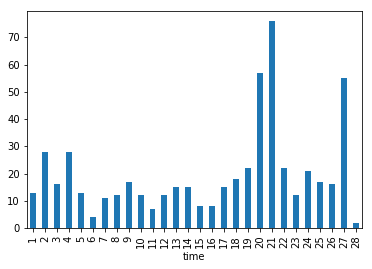

In [9]:
deg_40_all18=pd.read_csv('results_beaching/02_18/02_18_random_cay1_konsole.csv')
deg_40_all18['time']=deg_40_all18['time'].astype("datetime64")
deg_40_all18['time'].groupby(deg_40_all18["time"].dt.day).count().plot(kind="bar")


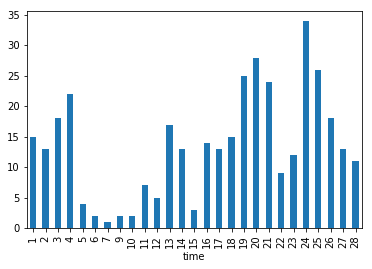

In [10]:
deg_40_all18=pd.read_csv('results_beaching/02_18/02_18_random_cay02_konsole.csv')
deg_40_all18['time']=deg_40_all18['time'].astype("datetime64")
deg_40_all18['time'].groupby(deg_40_all18["time"].dt.day).count().plot(kind="bar")

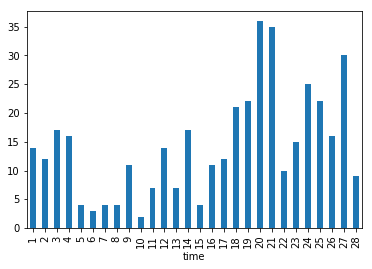

In [11]:
deg_40_all18=pd.read_csv('results_beaching/02_18/02_18_random_cay04_konsole.csv')
deg_40_all18['time']=deg_40_all18['time'].astype("datetime64")
deg_40_all18['time'].groupby(deg_40_all18["time"].dt.day).count().plot(kind="bar")


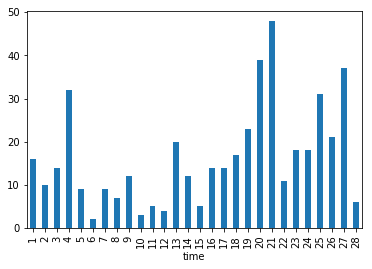

In [12]:
deg_40_all18=pd.read_csv('results_beaching/02_18/02_18_random_cay06_konsole.csv')
deg_40_all18['time']=deg_40_all18['time'].astype("datetime64")
deg_40_all18['time'].groupby(deg_40_all18["time"].dt.day).count().plot(kind="bar")


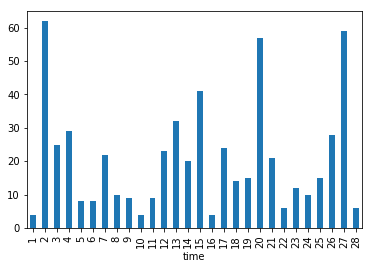

In [13]:
deg_40_all18=pd.read_csv('results_beaching/02_18/02_18_random_CD01_konsole.csv')
deg_40_all18['time']=deg_40_all18['time'].astype("datetime64")
deg_40_all18['time'].groupby(deg_40_all18["time"].dt.day).count().plot(kind="bar")


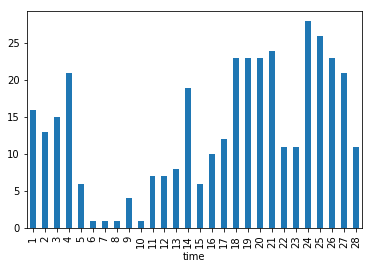

In [14]:
deg_40_all18=pd.read_csv('results_beaching/02_18/02_18_random_CD002_konsole.csv')
deg_40_all18['time']=deg_40_all18['time'].astype("datetime64")
deg_40_all18['time'].groupby(deg_40_all18["time"].dt.day).count().plot(kind="bar")


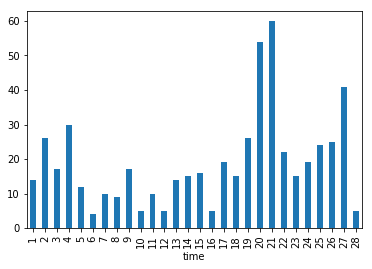

In [15]:
deg_40_all18=pd.read_csv('results_beaching/02_18/02_18_random_CD004_konsole.csv')
deg_40_all18['time']=deg_40_all18['time'].astype("datetime64")
deg_40_all18['time'].groupby(deg_40_all18["time"].dt.day).count().plot(kind="bar")


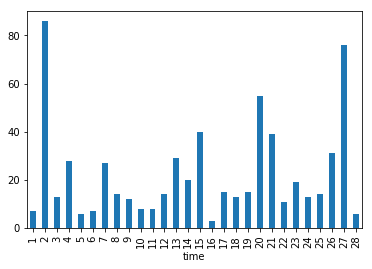

In [16]:
deg_40_all18=pd.read_csv('results_beaching/02_18/02_18_random_CD008_konsole.csv')
deg_40_all18['time']=deg_40_all18['time'].astype("datetime64")
deg_40_all18['time'].groupby(deg_40_all18["time"].dt.day).count().plot(kind="bar")